In [14]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

In [15]:
# Store url
url = 'https://www.gutenberg.org/files/2641/2641-h/2641-h.htm'

In [22]:
# Make the request
response = requests.get(url)

In [23]:
print(response.text)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of A Room With a View, by E. M. Forster</title>
<link rel="coverpage" href="images/cover.jpg" />
<style type="text/css" xml:space="preserve">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;

In [25]:
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(response.text, "html.parser")

In [26]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<title>The Project Gutenberg eBook of A Room With a View, by E. M. Forster</title>
<link href="images/cover.jpg" rel="coverpage"/>
<style type="text/css" xml:space="preserve">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}


In [36]:
# can check webpage title, and title of a book
soup.title # webpage
soup.h1 # book, as you can see in html code
soup.h2.contents # author

['By E. M. Forster']

In [51]:
# found URLs within a page’s < a > tags (hyperlinks)
chapters = soup.findAll('a')[1:23] # check all chapters
chapters

[<a href="#link2H_PART1"><b>Part One.</b></a>,
 <a href="#link2HCH0001">Chapter I. The Bertolini</a>,
 <a href="#link2HCH0002">Chapter II. In Santa Croce with No Baedeker</a>,
 <a href="#link2HCH0003">Chapter III. Music, Violets, and the Letter âSâ</a>,
 <a href="#link2HCH0004">Chapter IV. Fourth Chapter</a>,
 <a href="#link2HCH0005">Chapter V. Possibilities of a Pleasant Outing</a>,
 <a href="#link2HCH0006">Chapter VI. The Reverend Arthur Beebe, the Reverend Cuthbert Eager, Mr. Emerson, Mr. George Emerson, Miss Eleanor Lavish, Miss Charlotte Bartlett, and Miss Lucy Honeychurch Drive Out in Carriages to See a View; Italians Drive Them</a>,
 <a href="#link2HCH0007">Chapter VII. They Return</a>,
 <a href="#link2H_PART2"><b>Part Two.</b></a>,
 <a href="#link2HCH0008">Chapter VIII. Medieval</a>,
 <a href="#link2HCH0009">Chapter IX. Lucy As a Work of Art</a>,
 <a href="#link2HCH0010">Chapter X. Cecil as a Humourist</a>,
 <a href="#link2HCH0011">Chapter XI. In Mrs. Vyseâs Well-Appointe

In [94]:
text = soup.get_text()
len(tokens)

75975

# Start working with text

In [65]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/krasnyuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/krasnyuk/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [82]:
tokenizer = RegexpTokenizer('\w+')
# Create tokens
tokens = tokenizer.tokenize(text)
# Initialize new list
corpus = []
# Delete stopwords and after quick chek,
# i saw that there's letter 'e' in list,
# and it need to delete too(this is not a word)
for word in tokens:
    word = word.lower()
    if (len(word) >= 2) and word not in stopwords:
        corpus.append(word)
corpus[:20]

['project',
 'gutenberg',
 'ebook',
 'room',
 'view',
 'forster',
 'project',
 'gutenberg',
 'ebook',
 'room',
 'view',
 'forster',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'united',
 'states',
 'parts',
 'world']

### Now we can find the most frequent words and their counts

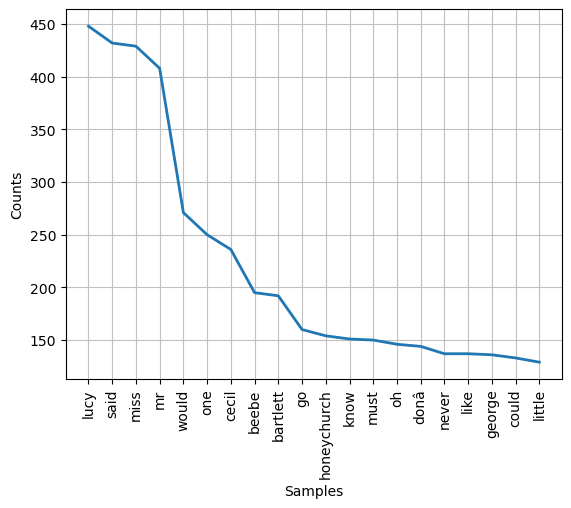

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [92]:
#Import datavision library
import matplotlib.pyplot as plt
import seaborn as sns

# Create freq dist and plot
freqdist1 = nltk.FreqDist(corpus) # Frequency distribution
freqdist1.plot(20)